In [1]:
%load_ext autoreload
%autoreload all

In [2]:
import torch
from datasets import load_dataset
from IPython.display import display
from dance.image import compress, decompress, preprocess, postprocess, RateDistortionAutoEncoder

In [3]:
device = "cpu"
model = RateDistortionAutoEncoder()
checkpoint = torch.load("dance/image.pth")
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
sum(p.numel() for p in model.encode.parameters())

285160

In [4]:
valid_dataset = load_dataset("danjacobellis/aria_ea_rgb_100k", split="validation").with_format("torch")

Resolving data files:   0%|          | 0/70 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/70 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

Compression Ratio: 796.4901566894335


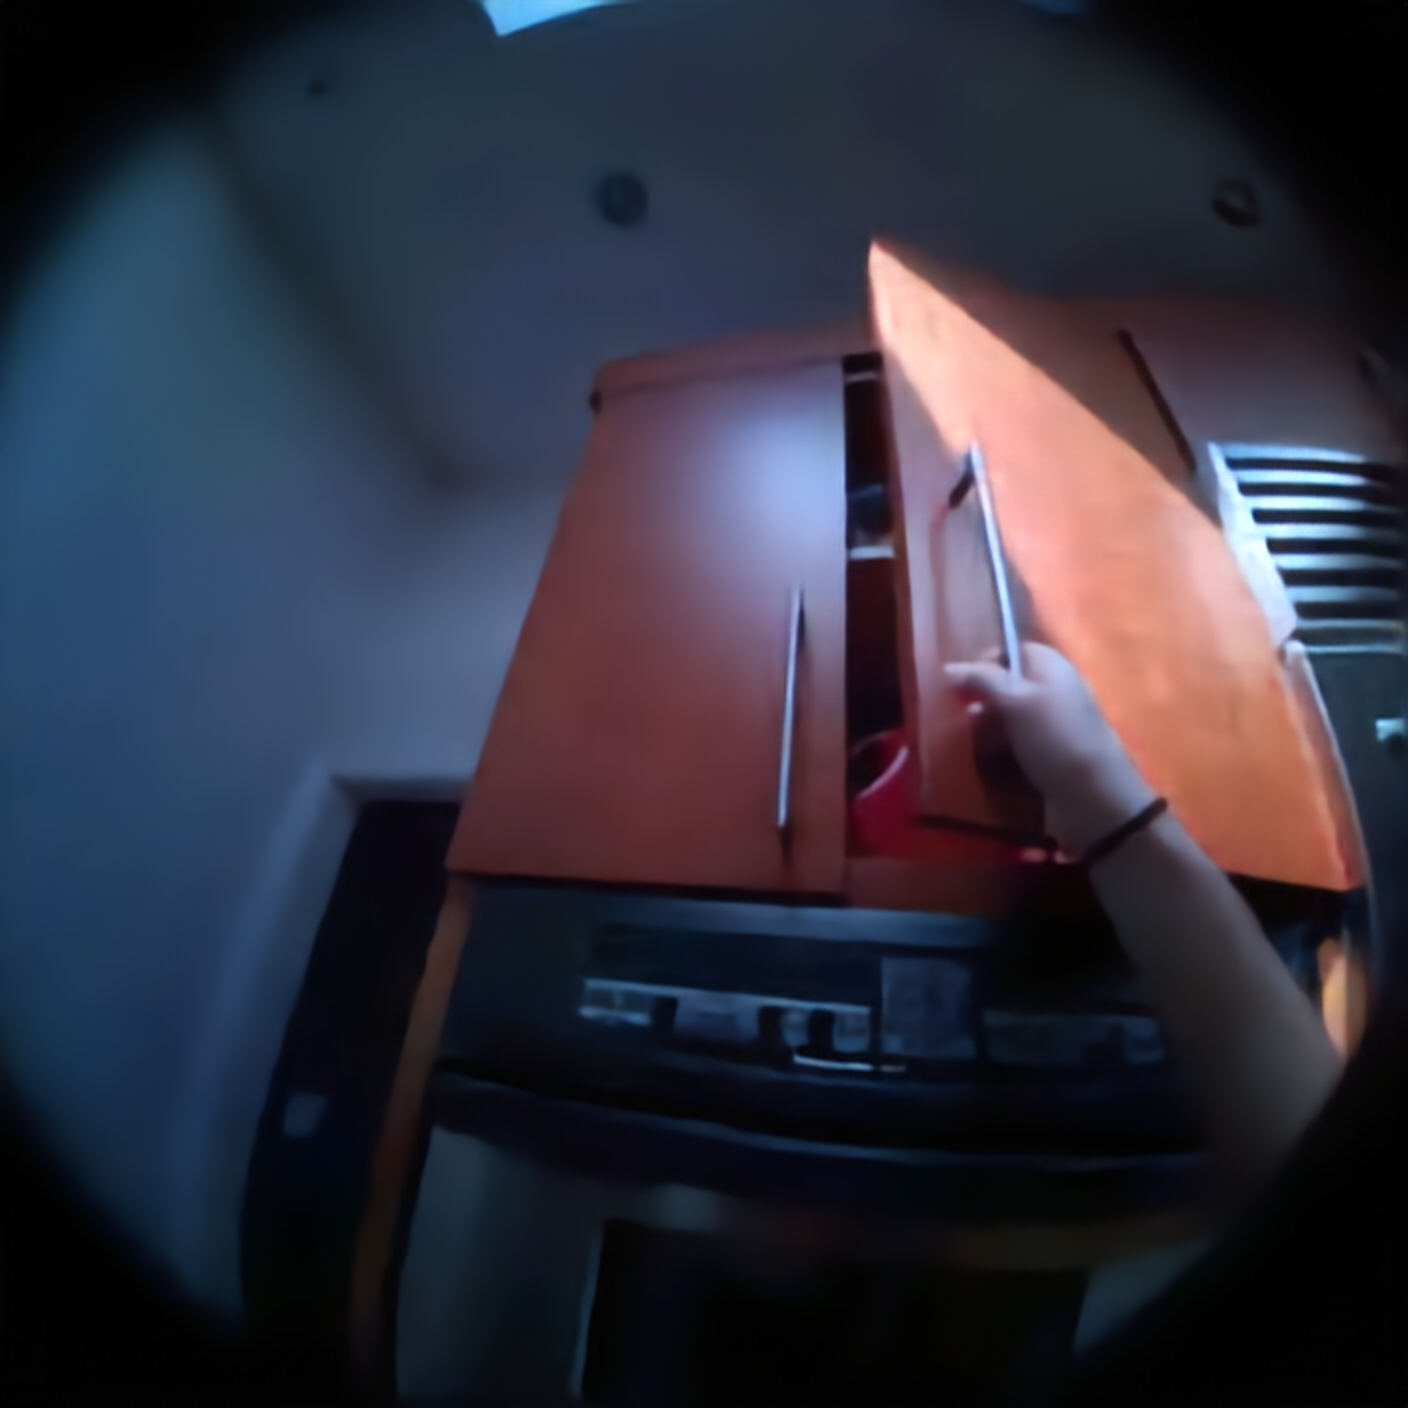

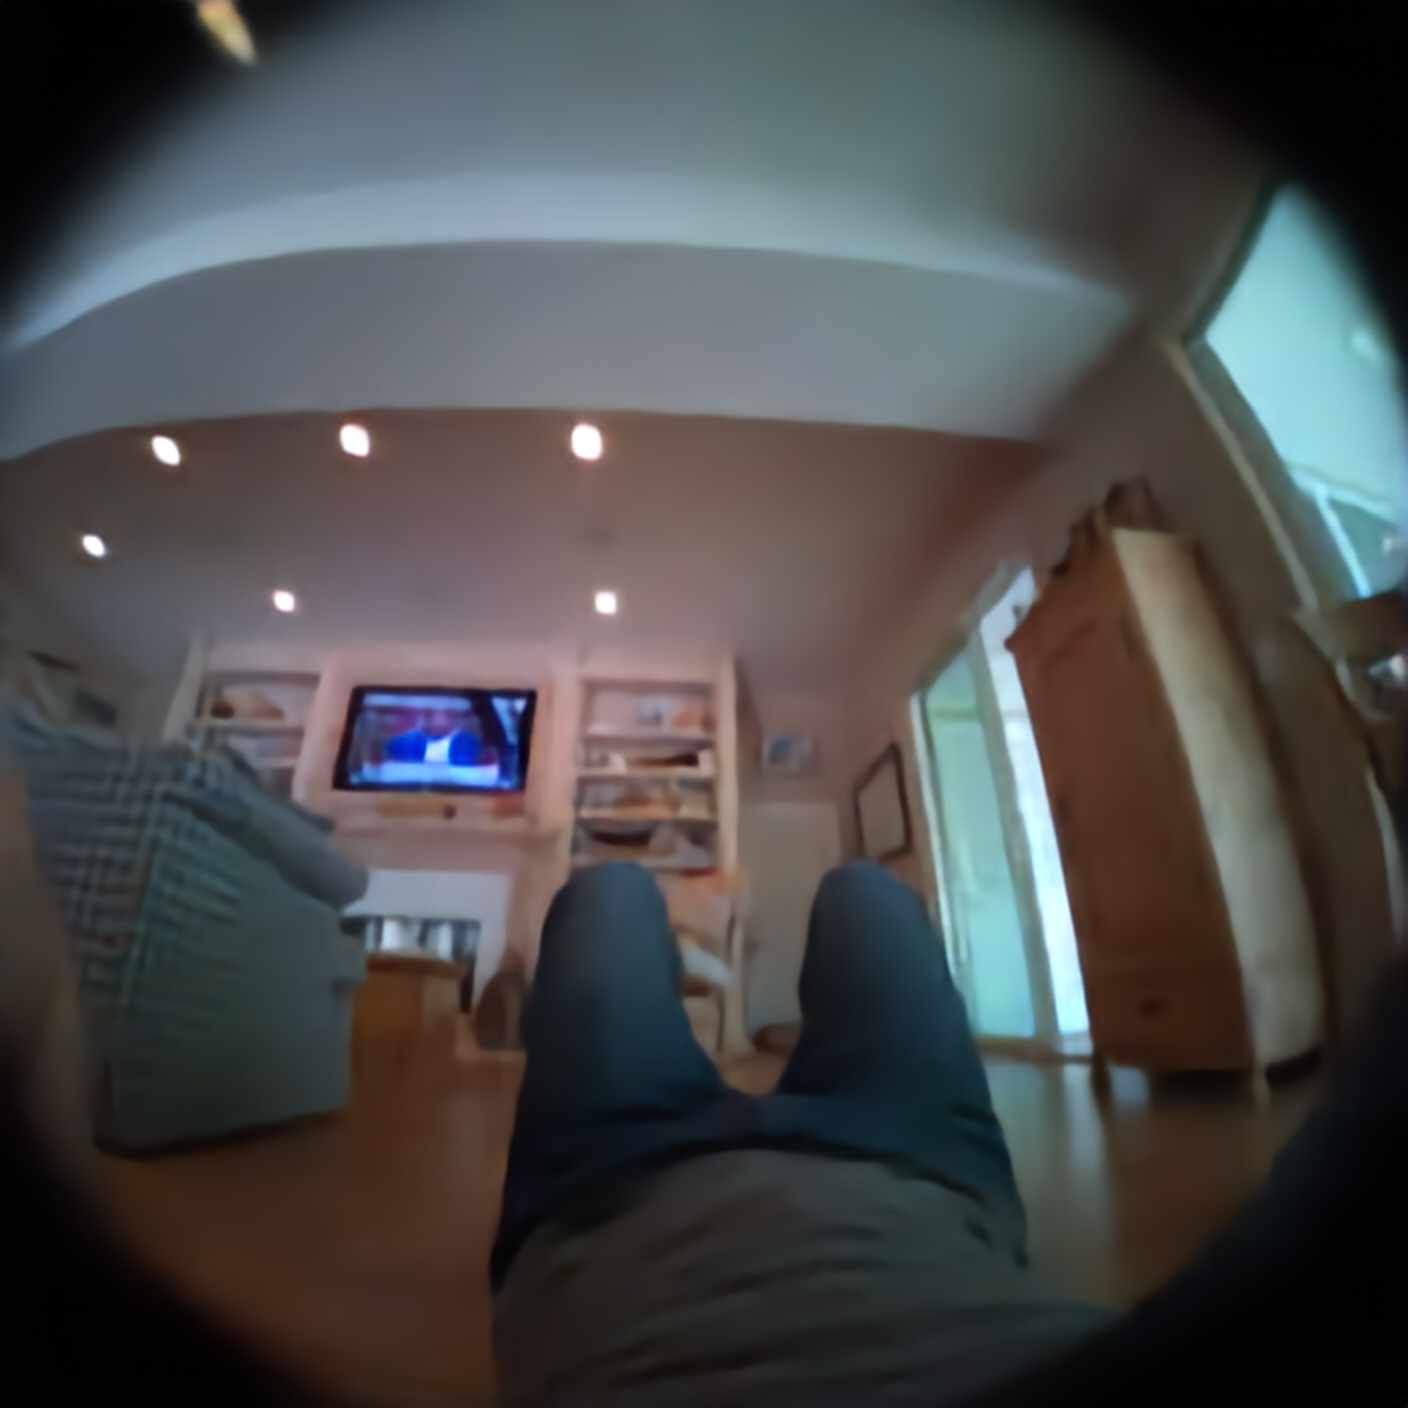

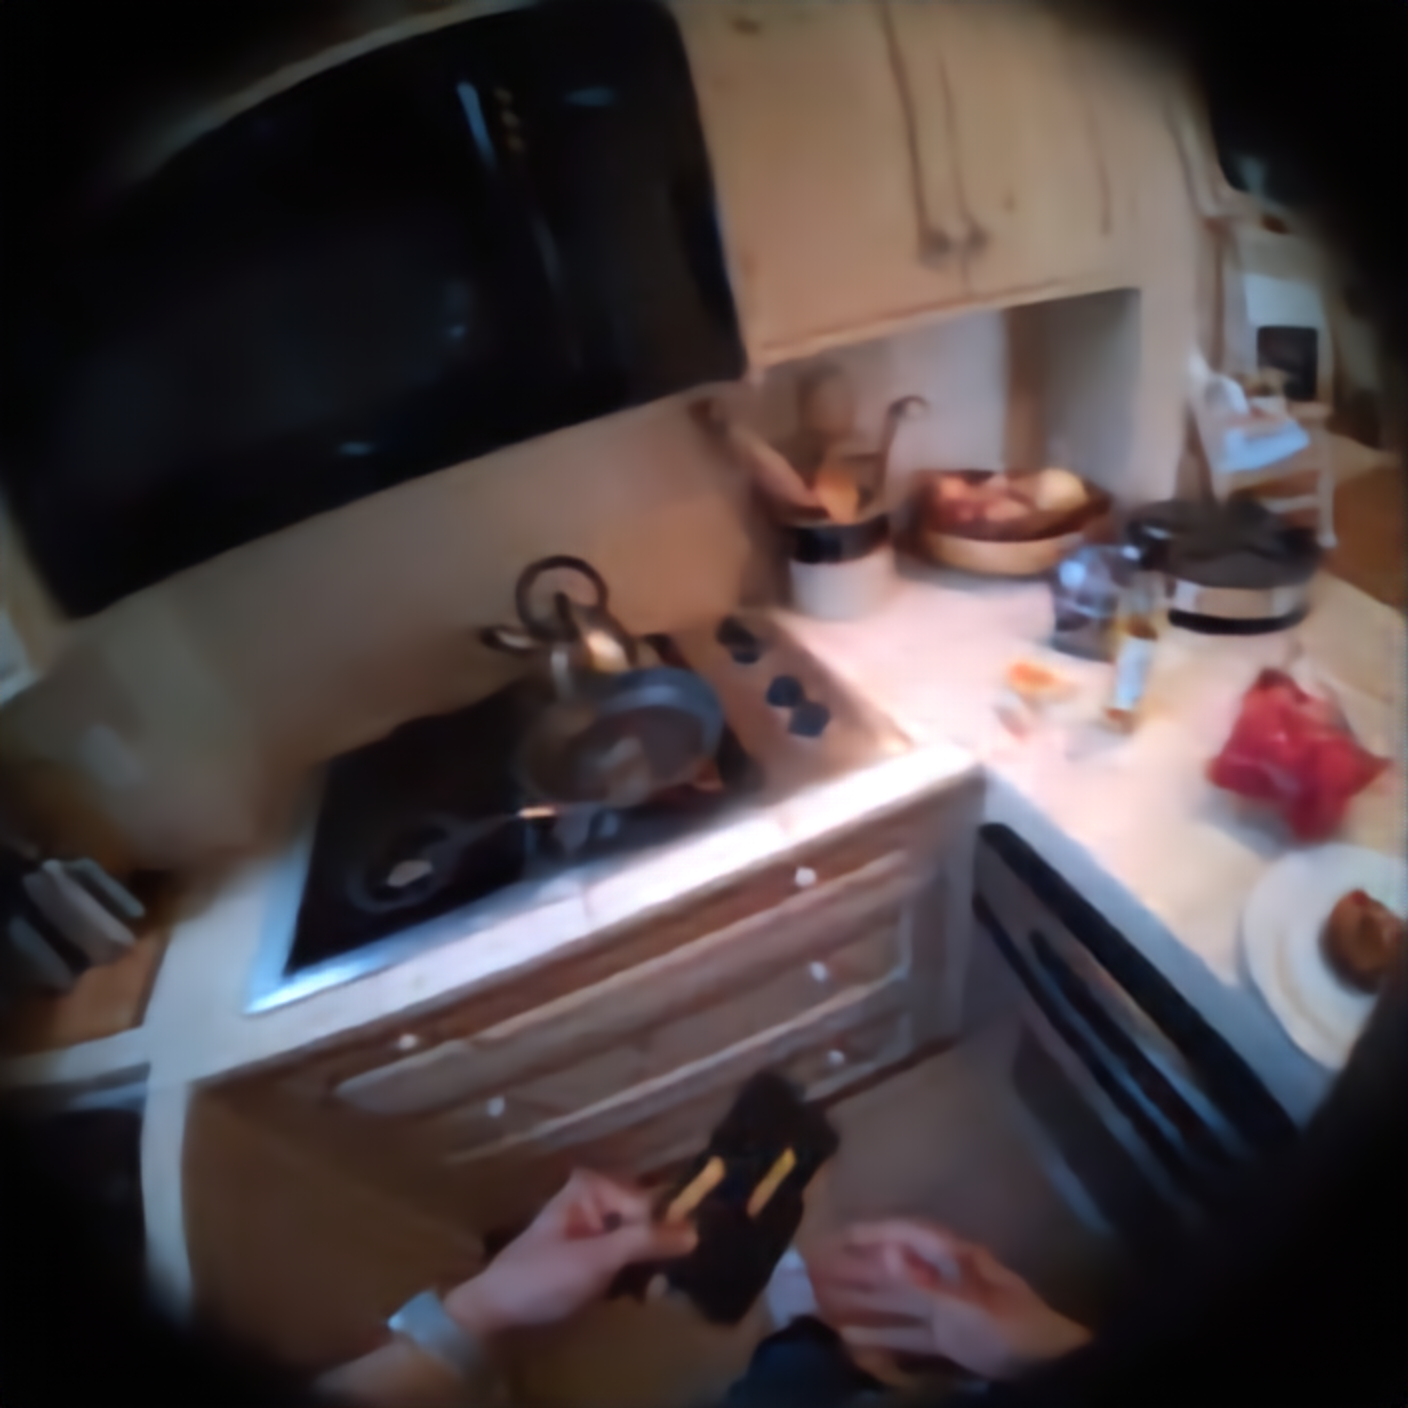

In [6]:
test_batch = preprocess(valid_dataset[[1000,3000,6000]]['image'], device)
compressed_img, original_shape = compress(test_batch, model)
rec = decompress(compressed_img, original_shape, model)
print("Compression Ratio:", test_batch.numel()/len(compressed_img))
for img in postprocess(rec):
    display(img)